In [27]:
from pycoingecko import CoinGeckoAPI
import datetime
import time

cg = CoinGeckoAPI()

# Get data for top cryptocurrencies by market cap
all_coins = cg.get_coins_markets(vs_currency='usd', order='market_cap_desc', per_page=300, page=1)

# Exclude stablecoins
# exclude_ids = ['tether', 'usd-coin']

# Define a list of specific coin IDs you want to include. Fill list of Coingecko IDs can be fetched with the script in the cell below
include_ids = ['matic-network','optimism','immutable-x','arbitrum','mantle']

#top_10_coins = [coin for coin in all_coins if coin['id'] not in exclude_ids][:10]
# Filter to include only the coins with the specified IDs
top_s_coins = [coin for coin in all_coins if coin['id'] in include_ids]

# Function to get daily spot rate for a given cryptocurrency
def get_daily_spot_rates(coin_id, days=90):
    historical_data = cg.get_coin_market_chart_by_id(id=coin_id, vs_currency='usd', days=days)
    prices = historical_data['prices']
    daily_rates = {datetime.datetime.fromtimestamp(price[0] / 1000).strftime('%Y-%m-%d'): price[1] for price in prices}
    return daily_rates

daily_spot_rates = {}

for coin in top_s_coins:
    coin_id = coin['id']
    coin_name = coin['name']

    print(f"Fetching daily spot rates for {coin_name}...")
    daily_spot_rates[coin_name] = get_daily_spot_rates(coin_id, days=90)  # Fetch for the past 90 days

    time.sleep(3) #Sleep to avoid hitting rate limits


for coin_name, rates in daily_spot_rates.items():
    print(f"\n{coin_name} Daily Spot Rates (Last 90 Days):")
    for date, rate in rates.items():
        print(f"{date}: {rate}")

Fetching daily spot rates for Polygon...
Fetching daily spot rates for Optimism...
Fetching daily spot rates for Arbitrum...
Fetching daily spot rates for Immutable...
Fetching daily spot rates for Mantle...

Polygon Daily Spot Rates (Last 90 Days):
2023-10-17: 0.5197487522287884
2023-10-18: 0.5117118313674054
2023-10-19: 0.5187192034994088
2023-10-20: 0.5382738726017532
2023-10-21: 0.5707074990175774
2023-10-22: 0.5904234715054264
2023-10-23: 0.6123607625744707
2023-10-24: 0.6215428003484308
2023-10-25: 0.6291186906121026
2023-10-26: 0.6315347767884536
2023-10-27: 0.6106789605536355
2023-10-28: 0.6220260679396862
2023-10-29: 0.6380483603599937
2023-10-30: 0.6473533196166401
2023-10-31: 0.6309721931191051
2023-11-01: 0.6608678452884041
2023-11-02: 0.6598095726569955
2023-11-03: 0.6681206972802557
2023-11-04: 0.6721308756673374
2023-11-05: 0.6841188734250967
2023-11-06: 0.720015938990823
2023-11-07: 0.7364950106709531
2023-11-08: 0.7908493280546779
2023-11-09: 0.8128205958382906
2023-11

In [8]:
# Extract the IDs of all coins in case you want a different selection for 'inlcude_ids'
coin_ids = [coin['id'] for coin in all_coins]
print("Coin IDs:")
for id in coin_ids:
    print(id)

Coin IDs:
bitcoin
ethereum
tether
binancecoin
solana
ripple
usd-coin
staked-ether
cardano
avalanche-2
dogecoin
tron
polkadot
chainlink
matic-network
the-open-network
wrapped-bitcoin
internet-computer
shiba-inu
litecoin
dai
bitcoin-cash
uniswap
ethereum-classic
cosmos
leo-token
optimism
near
stellar
okb
aptos
injective-protocol
celestia
filecoin
lido-dao
monero
immutable-x
arbitrum
hedera-hashgraph
kaspa
blockstack
crypto-com-chain
mantle
vechain
true-usd
first-digital-usd
maker
quant-network
bitcoin-cash-sv
sei-network
the-graph
rocket-pool-eth
ordinals
algorand
aave
render-token
elrond-erd-2
sui
thorchain
bittensor
sats-ordinals
mina-protocol
flow
havven
osmosis
fantom
axie-infinity
helium
tokenize-xchange
dydx-chain
the-sandbox
theta-token
bittorrent
tezos
kucoin-shares
beam-2
wemix-token
whitebit
bonk
dydx
neo
eos
decentraland
bitget-token
cheelee
kava
gala
astar
ethereum-name-service
frax-ether
chiliz
oasis-network
woo-network
iota
pancakeswap-token
blur
usdd
terra-luna
fetch-ai
ar

In [26]:
# Get market capitalizations on a specific date e.g. last rebalancing date

# Specify the date for historical data in DD-MM-YYYY format. In this case it should be a first day of the daily_spot_rates data set.
historic_date = '15-10-2023'

historic_market_caps = {}

for coin in top_10_coins:
    try:
        historic_data = cg.get_coin_history_by_id(id=coin['id'], date=historic_date)

        market_cap = historic_data['market_data']['market_cap']['usd']
        historic_market_caps[coin['id']] = market_cap

    except Exception as e:
        print(f"Error fetching historical data for {coin['id']}: {e}")

    time.sleep(1)

print(f"Market Cap Data on {historic_date}:")
for coin_id, market_cap in historic_market_caps.items():
    print(f"{coin_id}: {market_cap} USD")

Market Cap Data on 15-10-2023:
matic-network: 4811034664.436518 USD
optimism: 1056936607.713191 USD
immutable-x: 641347651.3662283 USD
arbitrum: 1024283071.7403392 USD
mantle: 1007110669.2336471 USD


In [30]:
# Get weights for index based on market cap

def calculate_crypto_weights(market_caps):
    """
    Calculate the weights of digital assets based on their market capitalizations.

    :param market_caps: Dictionary of market capitalizations for each digital asset.
    :return: Dictionary of weights for each digital asset.
    """
    total_market_cap = sum(market_caps.values())

    weights_mc = {crypto: market_cap / total_market_cap for crypto, market_cap in market_caps.items()}

    return weights_mc

weights_mc = calculate_crypto_weights(historic_market_caps)
print("Weights of the digital assets:")
for crypto, weight in weights_mc.items():
    print(f"{crypto}: {weight:.4f}")
sorted_weights = sorted_values = sorted(weights_mc.values(), reverse=True)


Weights of the digital assets:
matic-network: 0.5633
optimism: 0.1238
immutable-x: 0.0751
arbitrum: 0.1199
mantle: 0.1179


In [16]:
print(sorted_weights)

[0.4153859326215414, 0.18676182293542753, 0.14173523058557463, 0.1402786953420382, 0.11583831851541819]


In [31]:
# Construct index for each day of the data set

def calculate_daily_crypto_indices(crypto_data, base_level=1000, divisor_t=1):
    n = len(crypto_data)  # Number of cryptocurrencies
#    weights = [1/n] * n  # Equal weights for each cryptocurrency
    weights = sorted_weights
    # Extract spot rates for t0 (first date)
    spot_rates_t0 = [list(crypto.values())[0] for crypto in crypto_data.values()]

    daily_indices = {}

    for date in sorted(list(crypto_data.values())[0].keys()):
        spot_rates_t = [crypto[date] if date in crypto else None for crypto in crypto_data.values()]

        if None in spot_rates_t:
            print(f"Spot rates for {date} are not available for all cryptocurrencies.")
            continue

        sum_product = sum(w * (s_t / s_t0) for w, s_t, s_t0 in zip(weights, spot_rates_t, spot_rates_t0))
        index_level_t = (base_level * sum_product) / divisor_t

        daily_indices[date] = index_level_t

    return daily_indices

crypto_data = daily_spot_rates  # Your provided dictionary
daily_indices = calculate_daily_crypto_indices(crypto_data)

for date, index in daily_indices.items():
    print(f"Index Level on {date}: {index}")

Index Level on 2023-10-17: 1000.0
Index Level on 2023-10-18: 985.6151217108019
Index Level on 2023-10-19: 994.9791040946661
Index Level on 2023-10-20: 1036.9813069522959
Index Level on 2023-10-21: 1090.8154946602788
Index Level on 2023-10-22: 1112.2929553778554
Index Level on 2023-10-23: 1151.4261986210367
Index Level on 2023-10-24: 1176.2951820151131
Index Level on 2023-10-25: 1187.3889713499923
Index Level on 2023-10-26: 1204.7400750655888
Index Level on 2023-10-27: 1172.6098783652687
Index Level on 2023-10-28: 1189.9705296676248
Index Level on 2023-10-29: 1217.0860993796234
Index Level on 2023-10-30: 1235.3972955842282
Index Level on 2023-10-31: 1202.531136336939
Index Level on 2023-11-01: 1258.946679974447
Index Level on 2023-11-02: 1252.095075885166
Index Level on 2023-11-03: 1280.9292063382477
Index Level on 2023-11-04: 1323.1660764895742
Index Level on 2023-11-05: 1359.4635617127353
Index Level on 2023-11-06: 1406.8681985176806
Index Level on 2023-11-07: 1406.477887716234
Index 

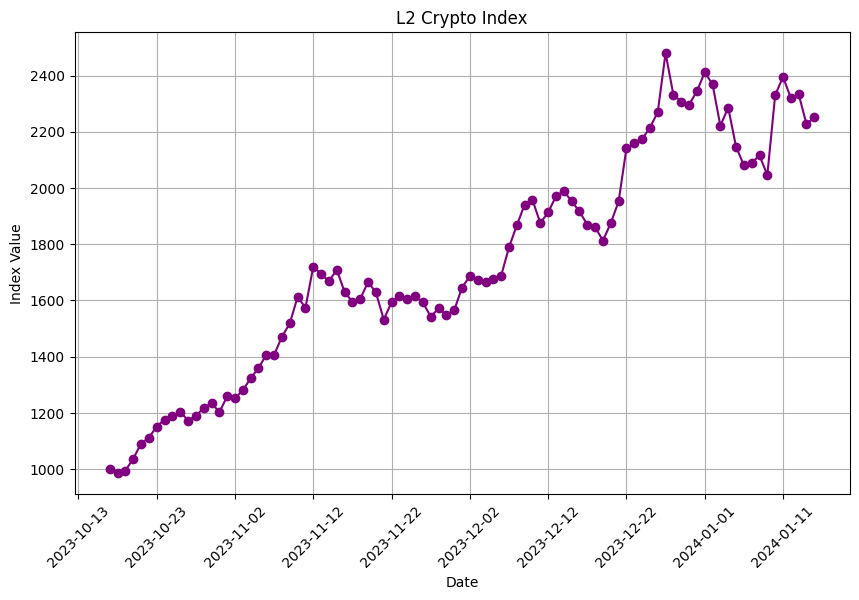

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


def plot_daily_indices(daily_indices, line_color='purple', file_name='crypto_index_chart.png'):
    dates = list(daily_indices.keys())
    indices = list(daily_indices.values())
    dates = [datetime.strptime(date, '%Y-%m-%d') for date in daily_indices.keys()]

    # Create a line plot with the specified line color
    plt.figure(figsize=(10, 6))
    plt.plot(dates, indices, marker='o', linestyle='-', color=line_color)

    plt.title('L2 Crypto Index')
    plt.xlabel('Date')
    plt.ylabel('Index Value')
    plt.xticks(rotation=45)
    plt.grid(True)

     # Set x-axis to show only every 10th date
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.savefig(file_name, format='png', bbox_inches='tight')

    plt.show()

# Example usage
plot_daily_indices(daily_indices, line_color='purple', file_name='crypto_index_chart.png')
